# Conectar al Portal/AGOL
    Para AGOL ingresar URL de la organización Ej. "https://asa-sec.maps.arcgis.com"
    Para Portal, URL del Portal /webadaptor Ej "https://demo.aeroterra.com/portal"

In [1]:
from arcgis.gis import *
from IPython.display import display
from getpass import getpass

In [4]:
portalurl=input("Ingrese URL de portal:")
user=input("Ingrese usuario administrador:")
portalpassword = getpass()
gis = GIS(portalurl, user, portalpassword)

Ingrese URL de portal:http://aeroterra.maps.arcgis.com
Ingrese usuario administrador:AGOL_ASA
········


In [5]:
gis = GIS(portalurl, user, portalpassword)

# Ingresar el usuario origen y el nuevo

In [6]:
orig_userid=input("Ingrese el usuario de origen:")
dest_userid=input("Ingrese ahora el de destino:")
orig_user=gis.users.get(orig_userid)
dest_user=gis.users.get(dest_userid)
orig_userid=orig_user['username']
dest_userid=dest_user['username']

Ingrese el usuario de origen:rsolorzano_aeroterra
Ingrese ahora el de destino:AGOL_ASA


rsolorzano_aeroterra


<User username:rsolorzano_aeroterra>
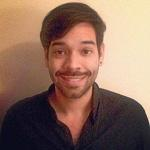

In [7]:
print(orig_userid)
orig_user

In [8]:
print(dest_userid.upper())
dest_user['username']

AGOL_ASA


'AGOL_ASA'

# Reasignación de ownership de grupos

In [9]:
usergroups = orig_user['groups']
for group in usergroups:
    grp = gis.groups.get(group['id'])
    print ("============================================================================================")
    print (grp['title']," / Owner: ",grp['owner'])
    print ("============================================================================================")
    if (grp.owner == orig_userid):
        grp.reassign_to(dest_userid)
        print("Owner reasignado a: ",dest_userid)
    else:
        if gis.users.search(grp.owner):
            grp.add_users(dest_userid)
            print ("Se asigno el usuario ",dest_userid," al grupo")

Mapas Ofrecidos  / Owner:  Esri_cy_AR
Se asigno el usuario  AGOL_ASA  al grupo
prueba2  / Owner:  rsolorzano_aeroterra
Owner reasignado a:  AGOL_ASA
Contenido Brindado  / Owner:  Esri_cy_UY
Se asigno el usuario  AGOL_ASA  al grupo
Mapas Brindados  / Owner:  Esri_cy_UY
Se asigno el usuario  AGOL_ASA  al grupo
Contenido Ofrecido  / Owner:  Esri_cy_AR
Se asigno el usuario  AGOL_ASA  al grupo
Prueba3  / Owner:  rsolorzano_aeroterra
Owner reasignado a:  AGOL_ASA


# Reasignacion de ownership de items

In [10]:
usercontent = orig_user.items()
folders = orig_user.folders
print ("============================================================================================")
print ("Root folder")
print ("============================================================================================")
gis.content.create_folder(orig_userid + "_" + "root", dest_userid)
for item in usercontent:
    print (item.title," / ", item.id)
    try:
        item.reassign_to(dest_userid, target_folder=orig_userid + "_" + "root")
    except Exception as e:
        if hasattr(e, 'message'):
            print(e.message)
        else:
            print(e)

for folder in folders:
    print ("============================================================================================")
    print (folder['title'])
    print ("============================================================================================")
    gis.content.create_folder(orig_userid + "_" + folder['title'], dest_userid)
    folderitems = orig_user.items(folder=folder['title'])
    for item in folderitems:
        print (item.title," / ", item.id)
        try:
            item.reassign_to(dest_userid, target_folder=orig_userid + "_" + folder['title'])
        except Exception as e:
            if hasattr(e, 'message'):
                print(e.message)
            else:
                print(e)

Root folder
Bicisendas Capital Federal  /  68cdac2b352a46918dd4190b31deea88
Departamentos Argentina  /  ce25b72e2df140859ad79fa885af12e0
Radios_censales  /  bedea24b0968439f9c7d9e7f62a58af8
Escuelas_Argentina  /  94f417e6cd804423ac30f80ffd4e27eb
BA - Application Data
BA Web App Migration Data  /  dea256dbe0864ef38ea65d0f14d33e36
BA Web App Preferences  /  1d0867ad49fb4261b9ef20416c2da523
BA Web App Custom Symbols  /  4652b762a714416b9af8abf83c1aecce
BA Web App Custom Color Ramps  /  f44eb42ddebe49108a79f6e78defd25c
BA Preferences  /  a8e74def671741f2ac82b8522f1be248
BA Web App Variable Manager Data  /  03a982fbc13a4a62a170a6ec8dc13ae2
BA Web App Suitability Analysis Data  /  5ae98e3c420442f8be67ce88061bf7a0
BA Web App Statistical Data Collections Data  /  95e3ba15a16c4113983f3e3be5fab00b
BA Web App Smart Map Search Data  /  e80362d948be4ce183616163fa387467
BA Web App Comparison Reports Data  /  fa42c8e71c8045548e38fbfab87439c9
BA Web App Favorite Reports Data  /  cb9695af4b374a07a857e0